In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

In [3]:
#Load data and call data frame mvt
mvt=pd.read_csv("data/mvtWeek1.csv")

C:\Users\lucasfermo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#How many rows/variables are in this dataset?
mvt.shape
#There are 191641 rows and 11 variables

(191641, 11)

In [5]:
#Maximum value of the 'ID' variable
max(mvt['ID'])

9181151

In [6]:
#Minimum value of the 'Beat' variable
min(mvt['Beat'])

111

In [7]:
#How many observations have value TRUE in the Arrest variable for which an arrest was made?
len(mvt.query("Arrest == True"))

15536

In [8]:
#How many observations have a LocationDescription value of Alley?
len(mvt.query("LocationDescription=='ALLEY'"))

2308

In [9]:
#In what format are the entries in the variable Date?
#Month/Day/Year Hour:Minute

In [12]:
dates=pd.DatetimeIndex(mvt['Date'])

In [13]:
#Convert date column to datetime index
#dates=pd.DatetimeIndex(mvt['Date])
mvt['Date']=dates

In [14]:
#Add day and monnth to dataframe variable
mvt['Weekday']=dates.weekday
mvt['Month']=dates.month
mvt['Year']=dates.year

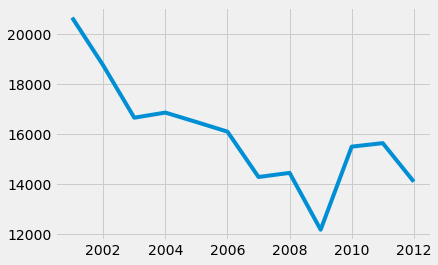

In [15]:
#Visualizing crime trends
group=mvt.groupby(mvt["Date"].map(lambda x:x.year))['Arrest'].count()
plt.plot(group)

In [149]:
#Proportion of motor vehicle thefts in 2001 was an arrest made
mvt.head()

1.0

In [153]:
#What proportion of vehicle thefts in 2001 were arrests made
tmp=mvt[mvt['Year']==2001]
len(tmp[tmp['Arrest']==True])/len(tmp)

0.10411727708161982

In [160]:
#What proportion of motor vehicle thefts in 2007 was an arrest made
tmp=mvt[mvt['Year']==2007]
len(tmp[tmp['Arrest']==True])/len(tmp)

0.08487394957983194

In [162]:
#What proportion of motor vehicle thefts in 2012 was an arrest made?
tmp=mvt[mvt['Year']==2012]
len(tmp[tmp['Arrest']==True])/len(tmp)

0.03902923644621062

In [261]:
#What are the most popular locations for theft
location=mvt.groupby('LocationDescription').count().sort_values(by='Arrest',ascending=False)
location=location[location.index!="OTHER"]
#location=location[:6]
#location.index
location=location[:5]

In [269]:
#Which location has the highest arrest rate?
topFive=mvt.loc[mvt["LocationDescription"].isin(location.index)]
arrests=topFive[topFive['Arrest']==True].groupby('LocationDescription').count()['Arrest']
total=topFive.groupby('LocationDescription').count()['Arrest']
final=pd.DataFrame(arrests/total).sort_values(by='Arrest',ascending=False)
#Gas Station

,Arrest
LocationDescription,
GAS STATION,0.207958
PARKING LOT/GARAGE(NON.RESID.),0.107932
ALLEY,0.107886
DRIVEWAY - RESIDENTIAL,0.078806
STREET,0.074059


In [287]:
#Which day of the week does most thefts happen at gas stations?
gas=mvt[mvt['LocationDescription']=='GAS STATION']
weekday=gas.groupby('Weekday').count()['Arrest']
weekday.argmax()

5

In [297]:
#Which day of the week does the least thefts happen at residential driveways?
driveways=mvt[mvt['LocationDescription']=='DRIVEWAY - RESIDENTIAL']
driveways.groupby('Weekday').count()['Arrest'].argmin()

5